<h2> 🕵🏻 Anomaly Detection: ECG 🏥 | Autoencoders </h2>

# Problem Statement: ECG

**The objective of detecting anomalies in ECG signals consists of finding the irregular heart rates, heartbeats, and rhythms. To achieve this goal, an anomaly detection system must be able to find them on all heartbeat sequences; therefore, to obtain the essential metrics.**

An electrocardiogram (ECG) is a simple test that can be used to check your heart's rhythm and electrical activity. Sensors attached to the skin are used to detect the electrical signals produced by your heart each time it beats.


<img src="https://img.freepik.com/premium-photo/patient-monitor-showing-vital-signs-ecg-ekg-vector-illustration_42416-358.jpg?w=1060" height=75% width=75% style="margin-left:12.5%;">

<h3>Autoencoders</h3>

Autoencoder is an important application of Neural Networks or Deep Learning. It is widely used in dimensionality reduction, image compression, image denoising, and feature extraction. It is also applied in anomaly detection and has delivered superior results.

This notebook uses autoencoders for detecting anomaly in ECG(electro cardiogram) readings. 
This is one of the very good practical application of autoencoders. 

[**Reference**](https://www.kaggle.com/code/devavratatripathy/ecg-anomaly-detection-using-autoencoders/notebook)


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model

In [2]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


👉🏻 **Note:** The dataset has 140 columns which represents the ECG readings and a labels column which has been encoded to **0 or 1** showing whether the ECG is **abnormal or normal**.

In [3]:
#separate the data and labels so that it will be easy for understanding
data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [4]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)

<h3>Normalizing the data to the range [0-1]</h3>

<img src="https://cdn.wallstreetmojo.com/wp-content/uploads/2019/05/Normalization-Formula.jpg" height="55%" width="55%" style="margin-left: 22.5%;">

In [5]:
#Now lets Normalize the data
#First we will calculate the maximum and minimum value from the training set 
min = tf.reduce_min(train_data)
max = tf.reduce_max(train_data)

#Now we will use the formula (data - min)/(max - min)
train_data = (train_data - min)/(max - min)
test_data = (test_data - min)/(max - min)

#I have converted the data into float
train_data = tf.cast(train_data, dtype=tf.float32)
test_data = tf.cast(test_data, dtype=tf.float32)

2022-12-29 08:14:55.037156: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
#The labels are either 0 or 1, so I will convert them into boolean(true or false) 
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#Now let's separate the data for normal ECG from that of abnormal ones
#Normal ECG data
n_train_data = train_data[train_labels]
n_test_data = test_data[test_labels]

#Abnormal ECG data
an_train_data = train_data[~train_labels]
an_test_data = test_data[~test_labels]

print(n_train_data)

tf.Tensor(
[[0.57030463 0.46561658 0.29058117 ... 0.48504233 0.4233502  0.47598344]
 [0.48320588 0.28246963 0.16471253 ... 0.567567   0.4677294  0.2692329 ]
 [0.48144642 0.35151404 0.25972766 ... 0.5479421  0.5077544  0.54298663]
 ...
 [0.41039047 0.24164985 0.13120876 ... 0.5277313  0.5654091  0.5023885 ]
 [0.5397748  0.4140786  0.28101394 ... 0.51266515 0.43706053 0.4426865 ]
 [0.29639772 0.15988176 0.18883787 ... 0.53766966 0.545786   0.40826708]], shape=(2359, 140), dtype=float32)


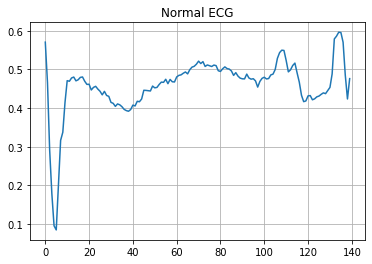

In [7]:
#Lets plot a normal ECG
plt.plot(np.arange(140), n_train_data[0])
plt.grid()
plt.title('Normal ECG')
plt.show()

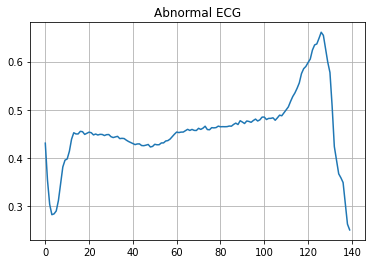

In [8]:
#Lets plot one from abnormal ECG
plt.plot(np.arange(140), an_train_data[0])
plt.grid()
plt.title('Abnormal ECG')
plt.show()

# Autoencoders : Analysis

Autoencoders are a specific type of feedforward neural network.

It consists of two parts:-
1.Encoder
2.Decoder

<img src="https://miro.medium.com/max/1400/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png" height=80% width=80% style="margin-left:10%">

<h3>So how the model will detect anomaly ?</h3>

We will create an encoder and a decoder using an ANN architecture. We are going to provide the ECG data as input and the model will try to reconstruct it. The error between the original data and reconstructed output will be called the **reconstruction error**. Based on this recostruction error we are going to classify an ECG as anomalous or not.In order to do this we are going to train the model only on the normal ECG data but it will be tested on the full test set, so that when an abnormal ECG is provided in the input the autoencoder will try to reconstruct it but since it has been only trained on normal ECG data the output will have a larger reconstruction error. We will also define a minimum threshold for the error i.e. if the reconstruction error is above the threshold then it will be categorised as anomalous. 


For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional representation, then decodes it back to an image. It learns to compress the data while minimizing the reconstruction error. 

<img src="https://static.packt-cdn.com/products/9781789344158/graphics/assets/e8c5f6fa-9522-4fc2-b1a8-f10d4e451148.png" height=80% width=80% style="margin-left:10%">

👉🏻 *In simple words, AutoEncoder is an unsupervised Artificial Neural Network that attempts to encode the data by compressing it into the lower dimensions (bottleneck layer or code) and then decoding the data to reconstruct the original input. The bottleneck layer (or code) holds the compressed representation of the input data.* 

In [9]:
#Now let's define the model!
#Here I have used the Model Subclassing API (but we can also use the Sequential API)
#The model has 2 parts : 1. Encoder and 2. Decoder
 
class detector(Model):
  def __init__(self):
    super(detector, self).__init__()
    self.encoder = tf.keras.Sequential([
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(8, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(140, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

👉🏻 **NOTE**: See that in fit() both the data are same i.e. n_train_data, the reason is that we will be comparing the original ECG with the reconstructed one to calculate the reconstruction error.
Autoencoders are unsupervised learning models but here we are training them using supervised method so its more like they are used as **self-supervised**.  

In [10]:
#Let's compile and train the model!!
autoencoder = detector()
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.fit(n_train_data, n_train_data, epochs = 20, batch_size=512, validation_data=(n_test_data, n_test_data))

2022-12-29 08:14:55.849338: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
5/5 [==============================] - 1s 68ms/step - loss: 0.0581 - val_loss: 0.0572
Epoch 2/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0568 - val_loss: 0.0558
Epoch 3/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0552 - val_loss: 0.0538
Epoch 4/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0529 - val_loss: 0.0511
Epoch 5/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0501 - val_loss: 0.0480
Epoch 6/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0469 - val_loss: 0.0447
Epoch 7/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0435 - val_loss: 0.0412
Epoch 8/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0400 - val_loss: 0.0378
Epoch 9/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0368 - val_loss: 0.0347
Epoch 10/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0338 - val_loss: 0.0319
Epoch 11/20
5/5 [============

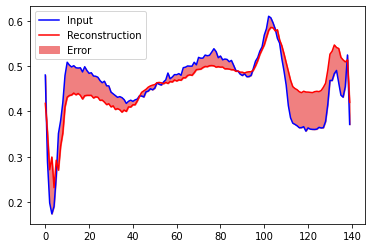

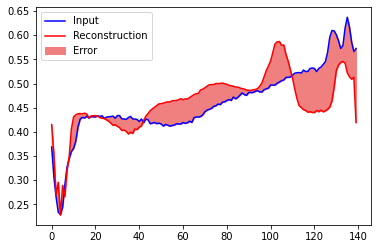

In [11]:
#Now let's define a function in order to plot the original ECG and reconstructed ones and also show the error
def plot(data, n):
  enc_img = autoencoder.encoder(data)
  dec_img = autoencoder.decoder(enc_img)
  plt.plot(data[n], 'b')
  plt.plot(dec_img[n], 'r')
  plt.fill_between(np.arange(140), data[n], dec_img[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Error'])
  plt.show()

plot(n_test_data, 0)
plot(an_test_data, 0)

👉🏻 As I mentioned earlier an ECG is anomalous if it is greater than a threshold. We can set the threshold in any way we want. Here I am going to set it to one standard deviation from the mean of normal training data.

In [12]:
reconstructed = autoencoder(n_train_data)
train_loss = losses.mae(reconstructed, n_train_data)
t = np.mean(train_loss) + np.std(train_loss)

def prediction(model, data, threshold):
  rec = model(data)
  loss = losses.mae(rec, data)
  return tf.math.less(loss, threshold)
print(t)

0.034047604


In [13]:
pred = prediction(autoencoder, n_test_data, t)
print(pred)

tf.Tensor(
[False  True  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  Tr

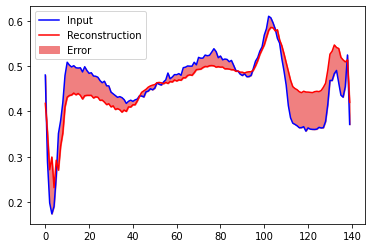

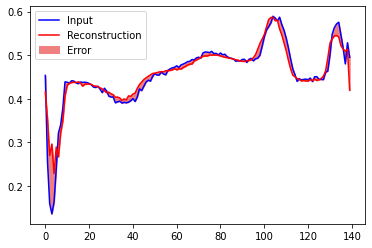

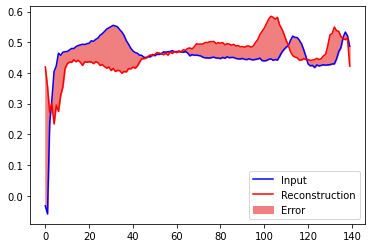

In [14]:
#Lets see some more result visually !!
plot(n_test_data, 0)
plot(n_test_data, 1)
plot(n_test_data, 3)

This model was just the basic model and it can be improved by doing hyperparameter tuning and making the encoder and decoder with DNN. 
The threshold was determined using a very simple method and it can be also changed for getting better and more accurate results. The criteria for determinig the threshold can make a lot of difference.

# Accuracy 🎯 

Out of **2359** Actual Shape of Prediction, **2240** were predicted correctly. 
This results in accuracy ≈ **94.96 %**


In [15]:
threshold = np.mean(train_loss) + 2*np.std(train_loss)
preds = tf.math.less(train_loss, threshold)
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=2240>

In [16]:
preds.shape

TensorShape([2359])

In [17]:
acc = 2240/2359*100
print("Accuracy = ", acc, "%")

Accuracy =  94.95548961424333 %


# Autoencoders: Applications

<h4> Dimensionality Reduction</h4>
<img src="https://miro.medium.com/max/828/1*phjqxD_E5dmhmxdnhSTmqg.webp" height=65% width=65% style="margin-left:17.5%">
<h4> Feature Extraction</h4>
<img src="https://miro.medium.com/max/828/1*pfnqLN-z0uBc3K4dzEHSlg.webp" height=80% width=80% style="margin-left:10%">
<h4> Audio or Image Denoising</h4>
<img src="https://miro.medium.com/max/816/0*GlQpchJiH9RDk85G.png" height=80% width=80% style="margin-left:10%">
<img src="https://miro.medium.com/max/828/1*LXEdX7tSK-RmDFhjmpj3zg.webp" height=80% width=80% style="margin-left:10%">
<h4> Image Compression</h4>
<img src="https://miro.medium.com/max/640/1*v52X-MwUYLLnH3Ju2mHTRQ.webp" height=60% width=60% style="margin-left:20%">
<h4> Image Search</h4>
<img src="https://miro.medium.com/max/828/1*aT__p5mj1sB9Wae1dSGYUw.webp" height=80% width=80% style="margin-left:10%">
<h4> Anomaly Detection</h4>
<img src="https://raw.githubusercontent.com/DHI/tsod/main/images/anomaly.png" height=60% width=60% style="margin-left:20%">
<h4> Missing Value Imputation</h4>
<img src="https://miro.medium.com/max/828/1*wmd9qmzRNkhgpWlDnDCbAw.webp" height=90% width=90% style="margin-left:5%">

<h4> Other Applications in Health Care, Aircraft Health Monitoring System, etc...</h4>

<img src="https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/e8b7b452504839.59139ae21aa61.gif" height=60% width=60% style="margin-left:20%">
<img src="https://i0.wp.com/apijet.com/wp-content/uploads/2019/09/AllFinals_AHM.png?resize=414%2C735&ssl=1" height=40% width=40% style="margin-left:30%">
<img src="https://i.pinimg.com/originals/7d/9b/1d/7d9b1d662b28cd365b33a01a3d0288e1.gif" height=60% width=60% style="margin-left:20%">